<ipython-input-2-7007d1b87644>:15: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()


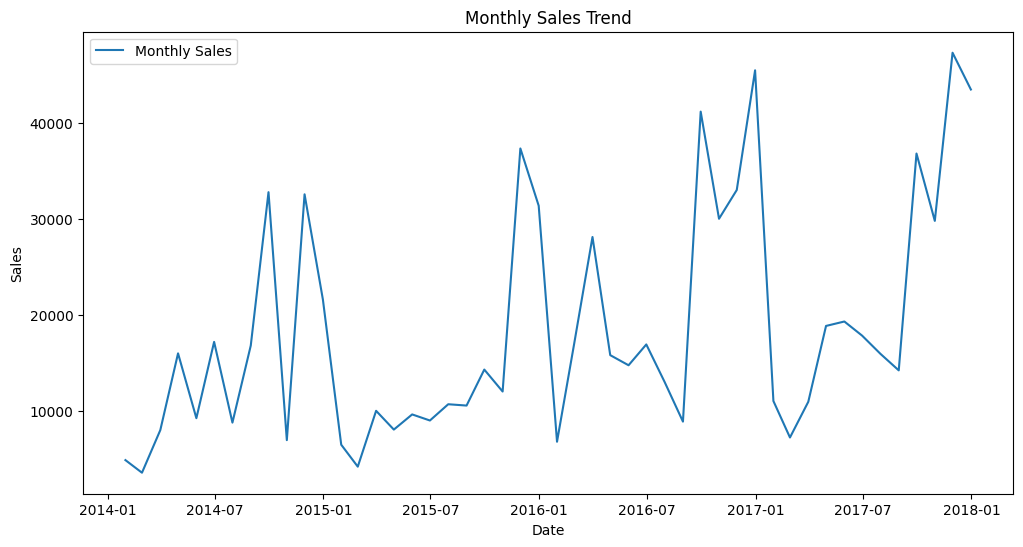

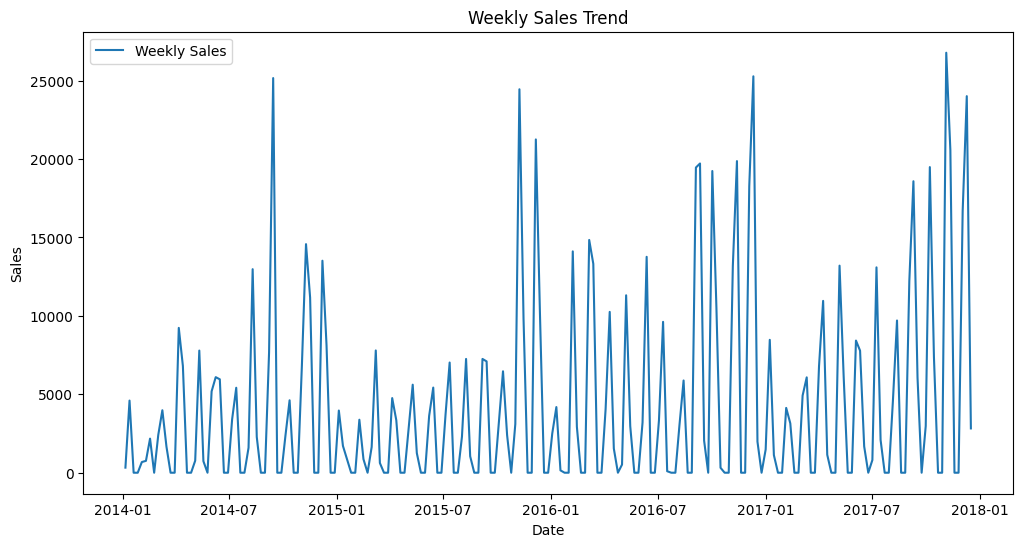

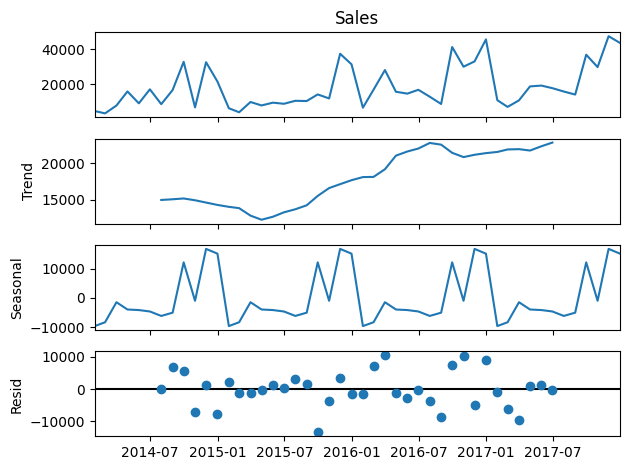

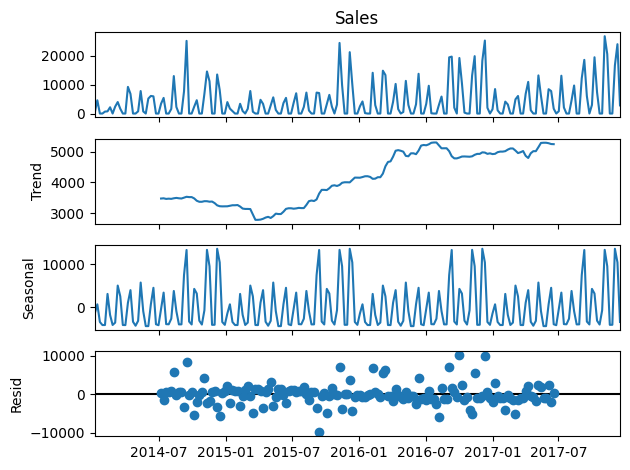

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-SUN will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


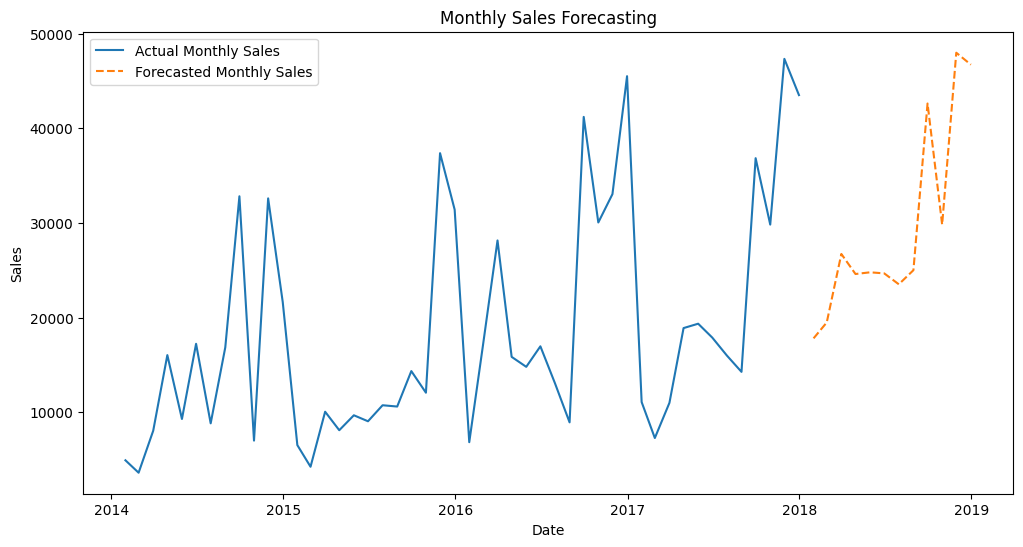

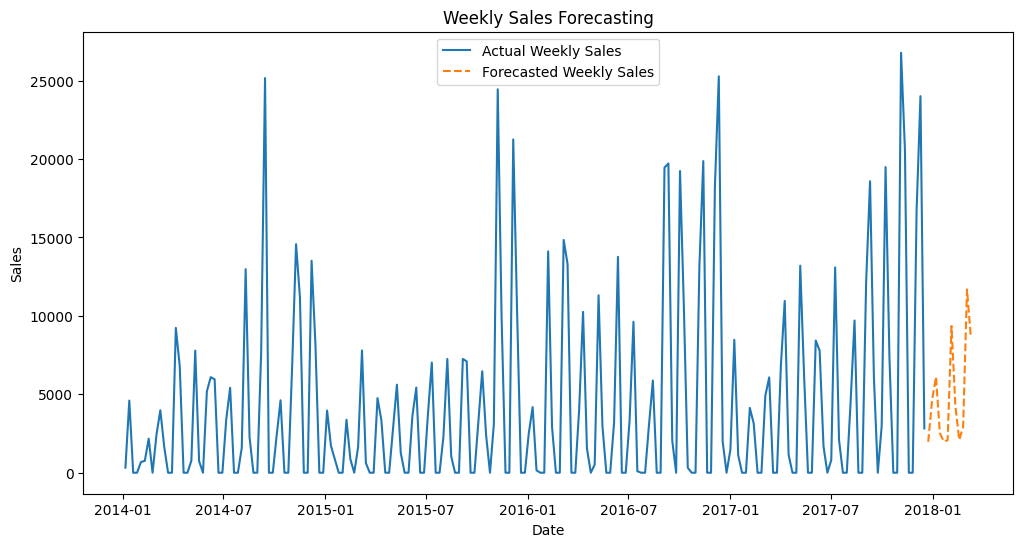

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
file_path = "Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'Order Date' to datetime format
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate sales by month and week
monthly_sales = df.resample('M', on='Order Date')['Sales'].sum()
weekly_sales = df.resample('W', on='Order Date')['Sales'].sum()

# Plot Monthly Sales
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Monthly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Trend')
plt.legend()
plt.show()

# Plot Weekly Sales
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Weekly Sales')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Trend')
plt.legend()
plt.show()

# Decomposition (for monthly data)
result_monthly = seasonal_decompose(monthly_sales, model='additive', period=12)
result_monthly.plot()
plt.show()

# Decomposition (for weekly data)
result_weekly = seasonal_decompose(weekly_sales, model='additive', period=52)
result_weekly.plot()
plt.show()

# Forecasting using Exponential Smoothing (monthly data)
model_monthly = ExponentialSmoothing(monthly_sales, trend='add', seasonal='add', seasonal_periods=12)
fit_monthly = model_monthly.fit()
forecast_monthly = fit_monthly.forecast(steps=12)

# Forecasting using Exponential Smoothing (weekly data)
model_weekly = ExponentialSmoothing(weekly_sales, trend='add', seasonal='add', seasonal_periods=52)
fit_weekly = model_weekly.fit()
forecast_weekly = fit_weekly.forecast(steps=12)

# Plot Monthly Forecast
plt.figure(figsize=(12, 6))
plt.plot(monthly_sales, label='Actual Monthly Sales')
plt.plot(forecast_monthly, label='Forecasted Monthly Sales', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Monthly Sales Forecasting')
plt.legend()
plt.show()

# Plot Weekly Forecast
plt.figure(figsize=(12, 6))
plt.plot(weekly_sales, label='Actual Weekly Sales')
plt.plot(forecast_weekly, label='Forecasted Weekly Sales', linestyle='dashed')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.title('Weekly Sales Forecasting')
plt.legend()
plt.show()


INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgse9hv8k/_pqpejyw.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpgse9hv8k/vfr8k2j4.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=85019', 'data', 'file=/tmp/tmpgse9hv8k/_pqpejyw.json', 'init=/tmp/tmpgse9hv8k/vfr8k2j4.json', 'output', 'file=/tmp/tmpgse9hv8k/prophet_model3ggg94bf/prophet_model-20250205075627.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:56:27 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:56:27 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


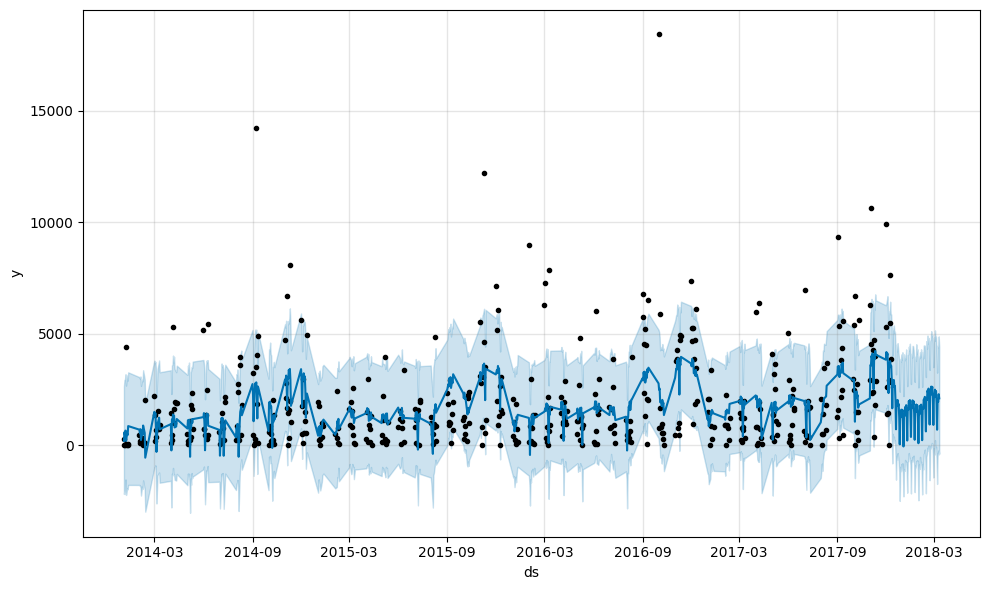

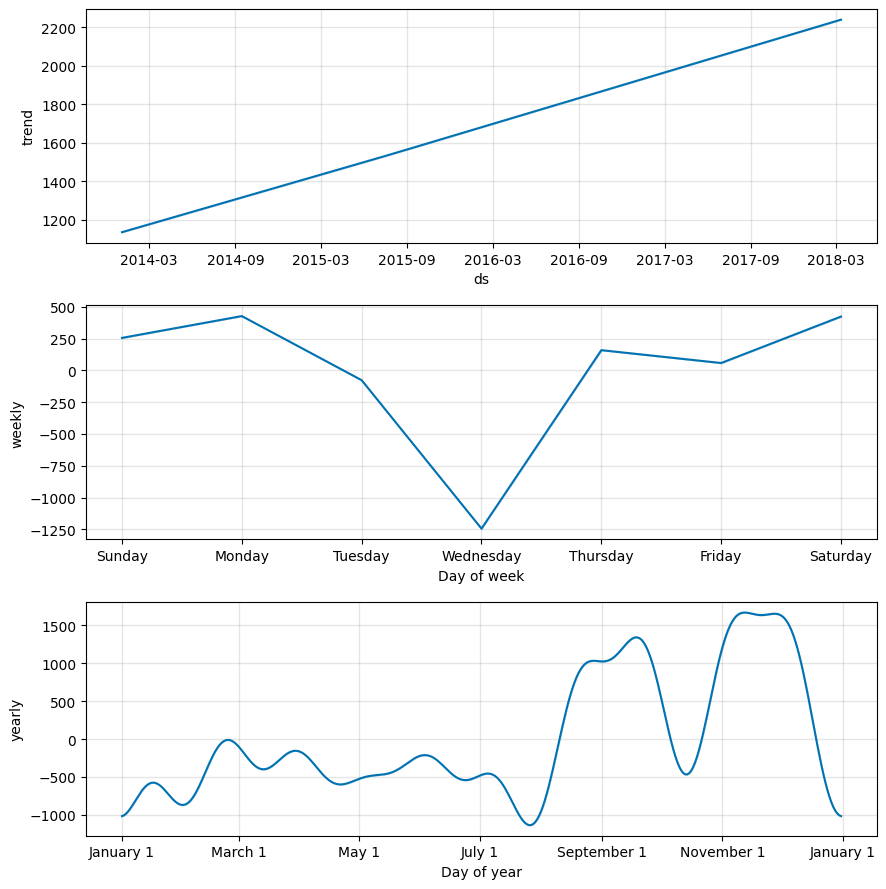

In [ ]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

# Load the dataset
file_path = "/content/Superstore - store analysis.csv"
df = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'Order Date' to datetime
df['Order Date'] = pd.to_datetime(df['Order Date'], errors='coerce')

# Aggregate sales by date
df_sales = df.groupby('Order Date')['Sales'].sum().reset_index()
df_sales.columns = ['ds', 'y']  # Rename columns for Prophet

# Initialize and fit the Prophet model
model = Prophet()
model.fit(df_sales)

# Create future dates for prediction
future = model.make_future_dataframe(periods=90)  # Predict next 90 days
forecast = model.predict(future)

# Plot forecast
fig1 = model.plot(forecast)
plt.show()

# Plot forecast components
fig2 = model.plot_components(forecast)
plt.show()
